In [54]:
# Import the warnings module
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

In [55]:
import pandas as pd

df = pd.read_csv('Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [56]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [57]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [59]:
df.rename(columns={'Annual Income (k$)':'AnnualIncome', 'Spending Score (1-100)':'SpendingScore'}, inplace = True)
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

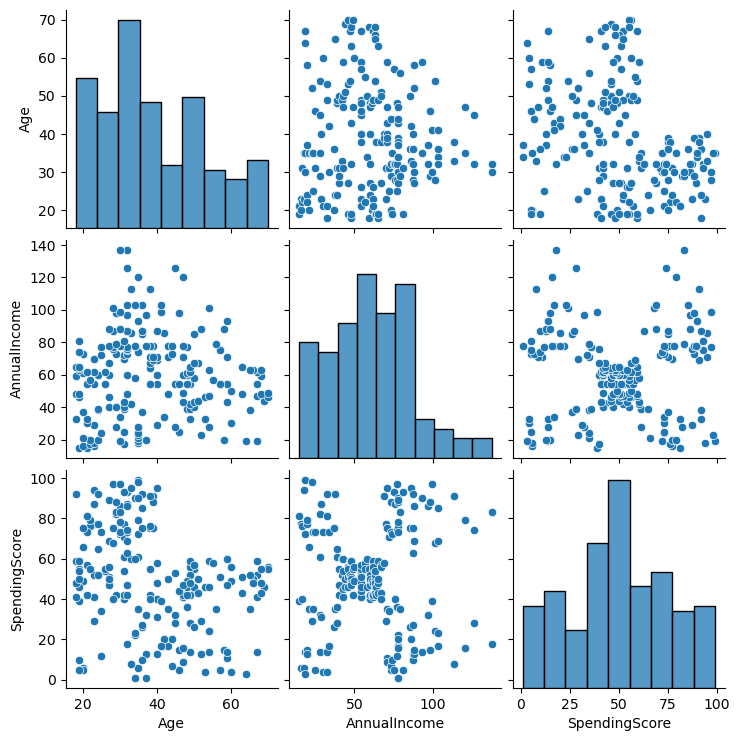

In [61]:
sns.pairplot(df[['Age','AnnualIncome','SpendingScore']])
plt.show()

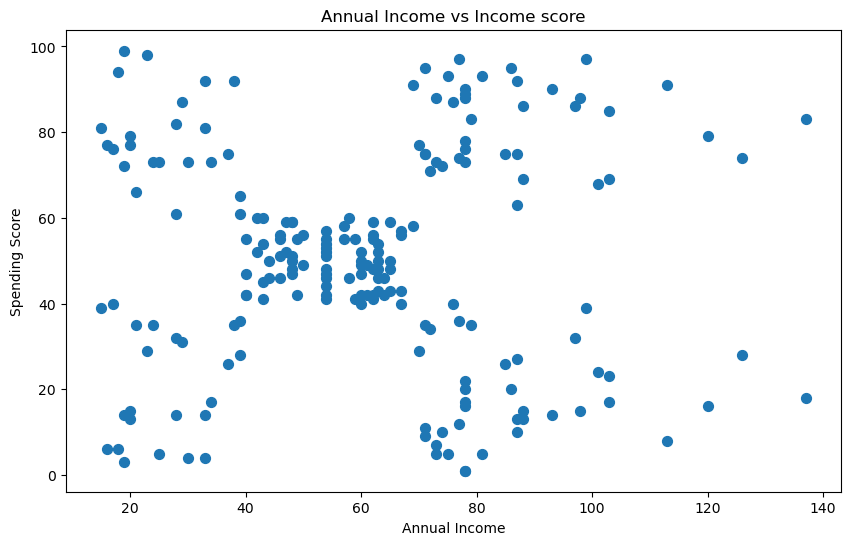

In [62]:
plt.figure(figsize= (10,6))
plt.scatter(df['AnnualIncome'], df['SpendingScore'], s = 50)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Annual Income vs Income score')
plt.show()

In [63]:
from sklearn.cluster import KMeans

X = df[['AnnualIncome', 'SpendingScore']]

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

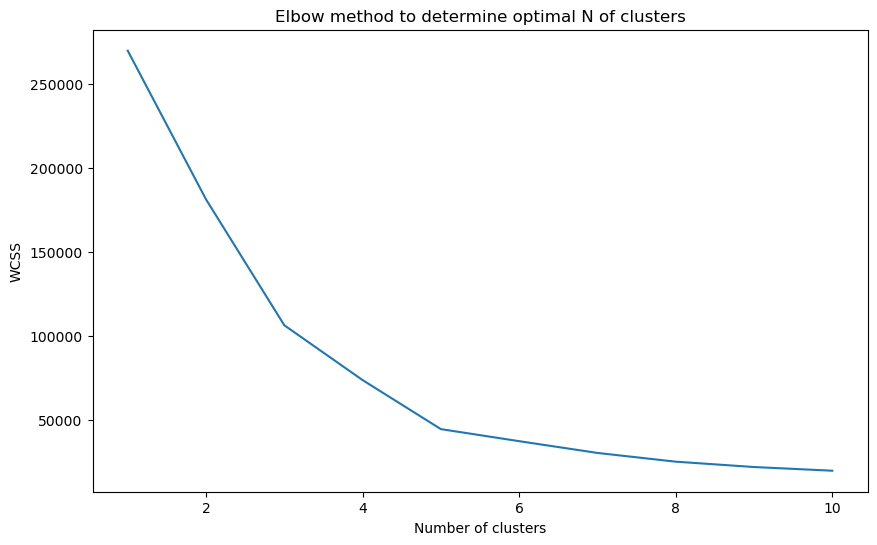

In [64]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow method to determine optimal N of clusters')
plt.show()

In [65]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [66]:
df['Cluster'] = y_kmeans

In [67]:
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


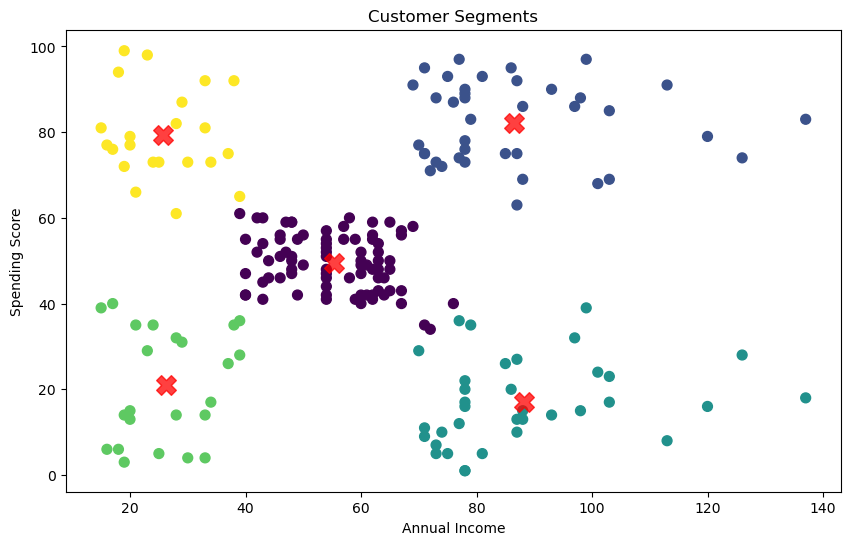

In [68]:
plt.figure(figsize=(10,6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segments')
plt.show()

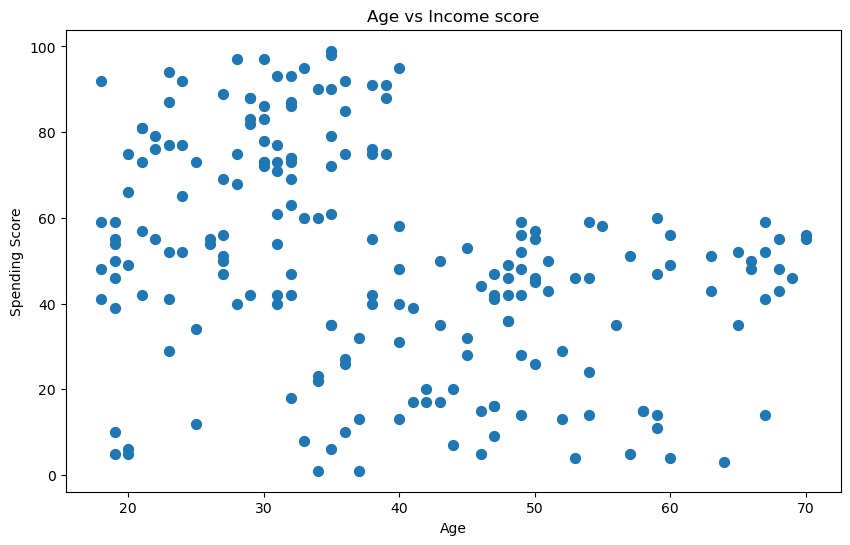

In [69]:
# Age vs Spending score
plt.figure(figsize= (10,6))
plt.scatter(df['Age'], df['SpendingScore'], s = 50)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Age vs Income score')
plt.show()

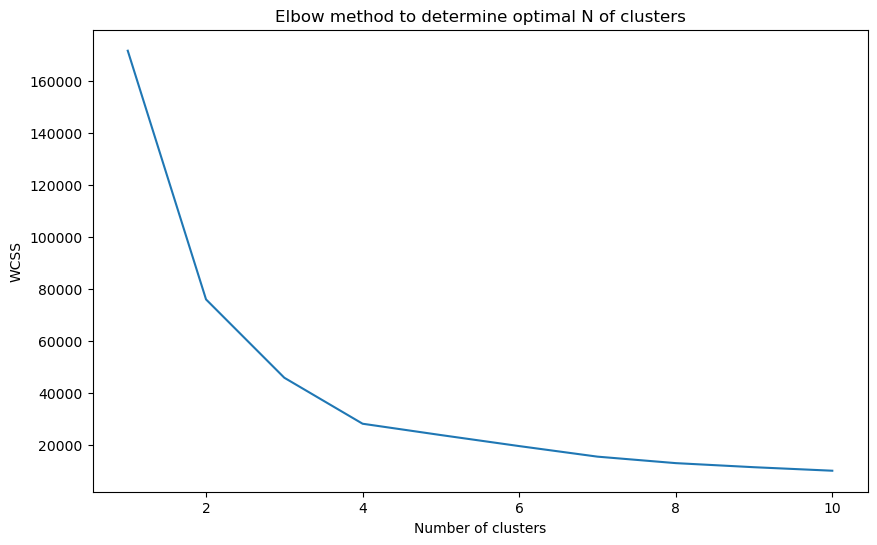

In [70]:
X = df[['Age', 'SpendingScore']]

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow method to determine optimal N of clusters')
plt.show()

In [71]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
df['ClusterAge'] = y_kmeans

In [72]:
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Cluster,ClusterAge
0,1,Male,19,15,39,3,3
1,2,Male,21,15,81,4,1
2,3,Female,20,16,6,3,2
3,4,Female,23,16,77,4,1
4,5,Female,31,17,40,3,3


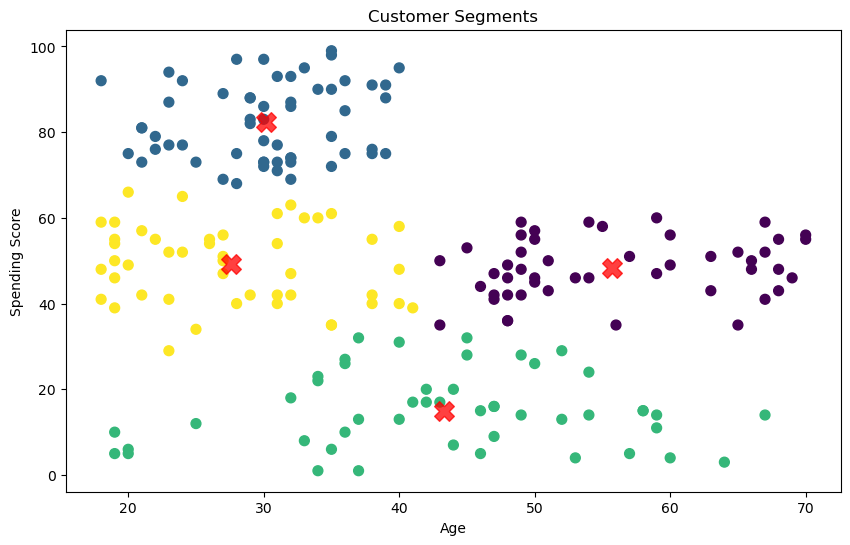

In [73]:
plt.figure(figsize=(10,6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Customer Segments')
plt.show()

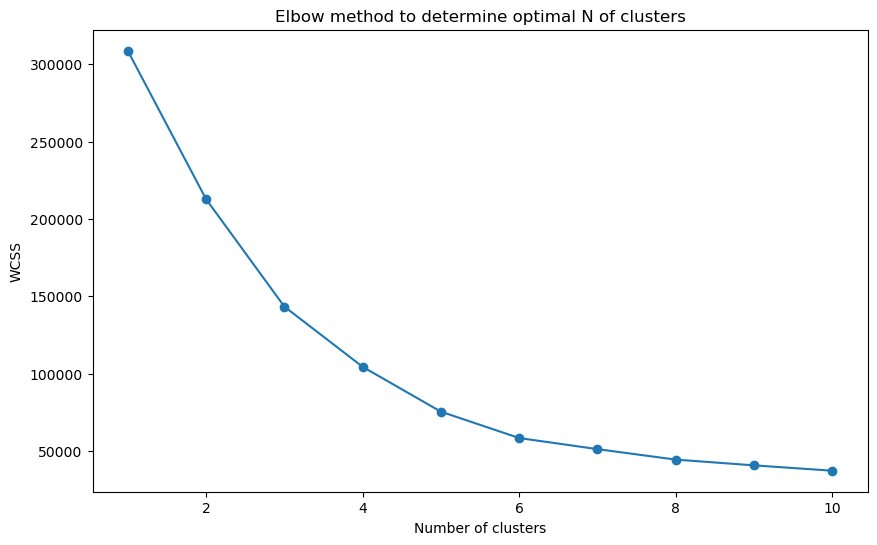

In [74]:
# Selecting features for clustering
X = df[['Age', 'AnnualIncome', 'SpendingScore']]

# Determinig the optimal number of clusters using the elbow method
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the elbow graph 
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow method to determine optimal N of clusters')
plt.show()

In [75]:
# Applying K-Means with the chosen number of clusters
kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
df['ClusterAgeIncomeSpend'] = y_kmeans

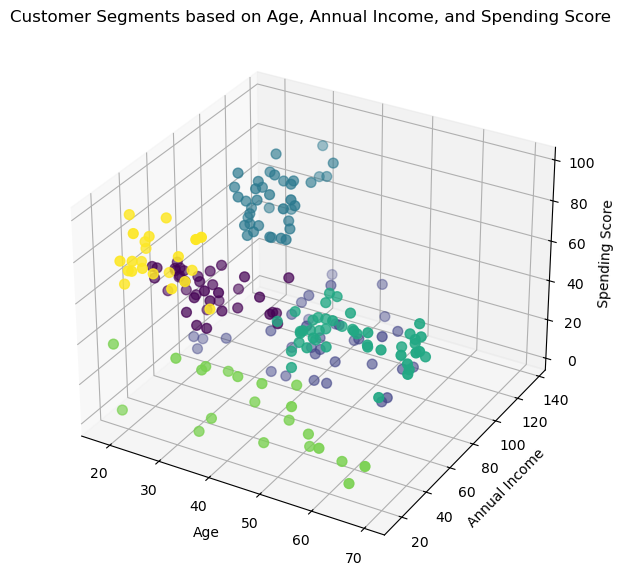

In [76]:
# Visualizing the clusters in a 3D plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['AnnualIncome'], df['SpendingScore'], c=df['ClusterAgeIncomeSpend'], s=50, cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.title('Customer Segments based on Age, Annual Income, and Spending Score')
plt.show()